## Loading of dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv("Multiclass Clothing Sales Dataset.csv")
df

,Product_Category,Brand,Product_Name,Gender,Size,Color,Season,Payment_Method,Customer_Type,Selling_Price,Cost_Price,Discount_Percentage,Quantity_Sold,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Sales_Category
0,Traditional Wear,Forever 21,Tops,Women,S,White,Winter,Card,New,1817.433878,816.027585,26.260791,6,42241.692855,294.0,58.0,2.560957,3.106155,29.293331,High Sales
1,Athleisure,Ralph Lauren,Casual Shirt,Men,XXL,Yellow,All-Season,Card,Returning,1672.038198,793.236861,26.882613,8,69318.541482,376.0,40.0,1.590993,3.428439,19.473670,Low Sales
2,Outerwear,Nike,Blazer,Men,S,Green,All-Season,UPI,Returning,1381.568069,890.469629,30.274720,5,56851.121070,48.0,41.0,3.066213,3.765591,22.083407,Medium Sales
3,Athleisure,Zara,Leggings,Women,M,White,Winter,UPI,Returning,859.507388,1497.080062,NaN,4,72084.361720,362.0,32.0,2.194826,4.530297,17.282082,Medium Sales
4,Athleisure,Zara,Dress,Men,XL,Yellow,Summer,Net Banking,Returning,1642.176945,896.187442,NaN,2,29846.082696,34.0,27.0,2.014097,4.644271,9.379608,Medium Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Bottoms,Reebok,Shorts,Women,M,Blue,Winter,Card,Returning,10767.178826,9139.999900,38.980305,63,75646.215694,NaN,60.0,29.000000,1.187524,15.571466,Low Sales
99996,Tops,Zara,Shorts,Women,L,Blue,All-Season,Net Banking,New,19506.226429,9703.809963,11.782079,105,46527.214784,390.0,28.0,36.000000,1.654000,22.948494,Medium Sales
99997,Athleisure,Calvin Klein,Jacket,Women,XL,Orange,Winter,UPI,Returning,9130.514899,11436.593549,25.184848,172,44611.196540,435.0,61.0,23.000000,1.432143,15.803273,Low Sales
99998,Traditional Wear,Nike,Sweatshirt,Women,S,White,Winter,Cash,New,19014.366546,11531.865941,2.788690,154,43867.117367,452.0,22.0,46.000000,2.141555,1.867981,High Sales


In [3]:
print(df['Season'].unique())

['Winter' 'All-Season' 'Summer']


## Handle missing values

In [4]:
df.isnull().sum()

Product_Category          0
Brand                     0
Product_Name              0
Gender                    0
Size                      0
Color                     0
Season                    0
Payment_Method            0
Customer_Type             0
Selling_Price          5000
Cost_Price                0
Discount_Percentage    5000
Quantity_Sold             0
Total_Sales               0
Stock_Availability     5000
Customer_Age           5000
Purchase_Frequency        0
Store_Rating           5000
Return_Rate               0
Sales_Category            0
dtype: int64

In [5]:
df = df.dropna(subset=["Selling_Price"])
num_cols = ["Discount_Percentage", "Stock_Availability", "Customer_Age", "Store_Rating"]
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

C:\Users\Admin\AppData\Local\Temp\ipykernel_24740\4027898337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [6]:
df.isnull().sum()

Product_Category       0
Brand                  0
Product_Name           0
Gender                 0
Size                   0
Color                  0
Season                 0
Payment_Method         0
Customer_Type          0
Selling_Price          0
Cost_Price             0
Discount_Percentage    0
Quantity_Sold          0
Total_Sales            0
Stock_Availability     0
Customer_Age           0
Purchase_Frequency     0
Store_Rating           0
Return_Rate            0
Sales_Category         0
dtype: int64

## Encode categorical variables

In [7]:
cat_cols = ["Product_Category", "Brand", "Gender", "Size", "Color", "Season",
            "Payment_Method", "Customer_Type", "Sales_Category"]

for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


C:\Users\Admin\AppData\Local\Temp\ipykernel_24740\647304459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_24740\647304459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_24740\647304459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [8]:
df.head()

,Product_Category,Brand,Product_Name,Gender,Size,Color,Season,Payment_Method,Customer_Type,Selling_Price,Cost_Price,Discount_Percentage,Quantity_Sold,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Sales_Category
0,4,4,Tops,1,2,7,2,0,0,1817.433878,816.027585,26.260791,6,42241.692855,294.0,58.0,2.560957,3.106155,29.293331,0
1,0,12,Casual Shirt,0,4,8,0,0,1,1672.038198,793.236861,26.882613,8,69318.541482,376.0,40.0,1.590993,3.428439,19.473670,1
2,2,10,Blazer,0,2,2,0,3,1,1381.568069,890.469629,30.274720,5,56851.121070,48.0,41.0,3.066213,3.765591,22.083407,2
3,0,19,Leggings,1,1,7,2,3,1,859.507388,1497.080062,24.996780,4,72084.361720,362.0,32.0,2.194826,4.530297,17.282082,2
4,0,19,Dress,0,3,8,1,2,1,1642.176945,896.187442,24.996780,2,29846.082696,34.0,27.0,2.014097,4.644271,9.379608,2


## check for outliers

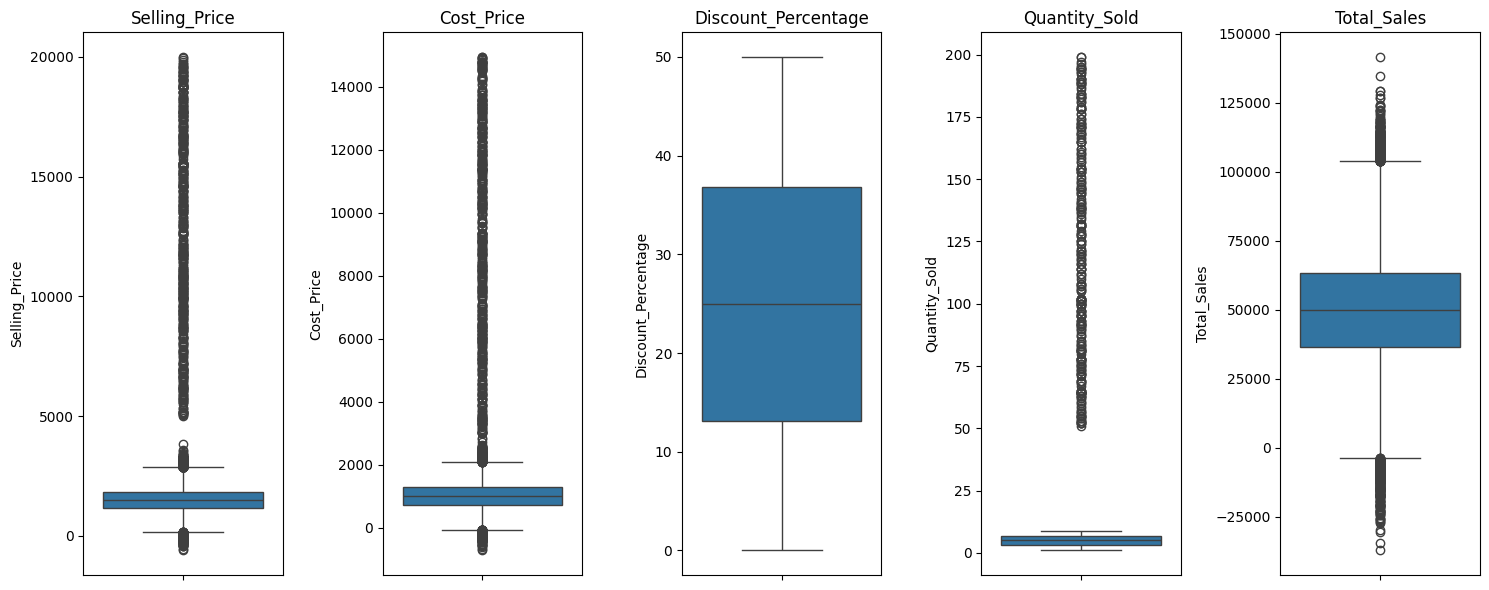

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Selling_Price", "Cost_Price", "Discount_Percentage", "Quantity_Sold", "Total_Sales"]

plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [10]:
z_scores = np.abs(zscore(df[num_cols]))
outliers_z = (z_scores > 3).sum()
print("Outliers detected using Z-Score method:\n", outliers_z)

Outliers detected using Z-Score method:
 Selling_Price          482
Cost_Price             471
Discount_Percentage      0
Quantity_Sold          288
Total_Sales            241
dtype: int64


In [11]:
df = df[(z_scores < 3).all(axis=1)]

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[num_cols] = df[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)


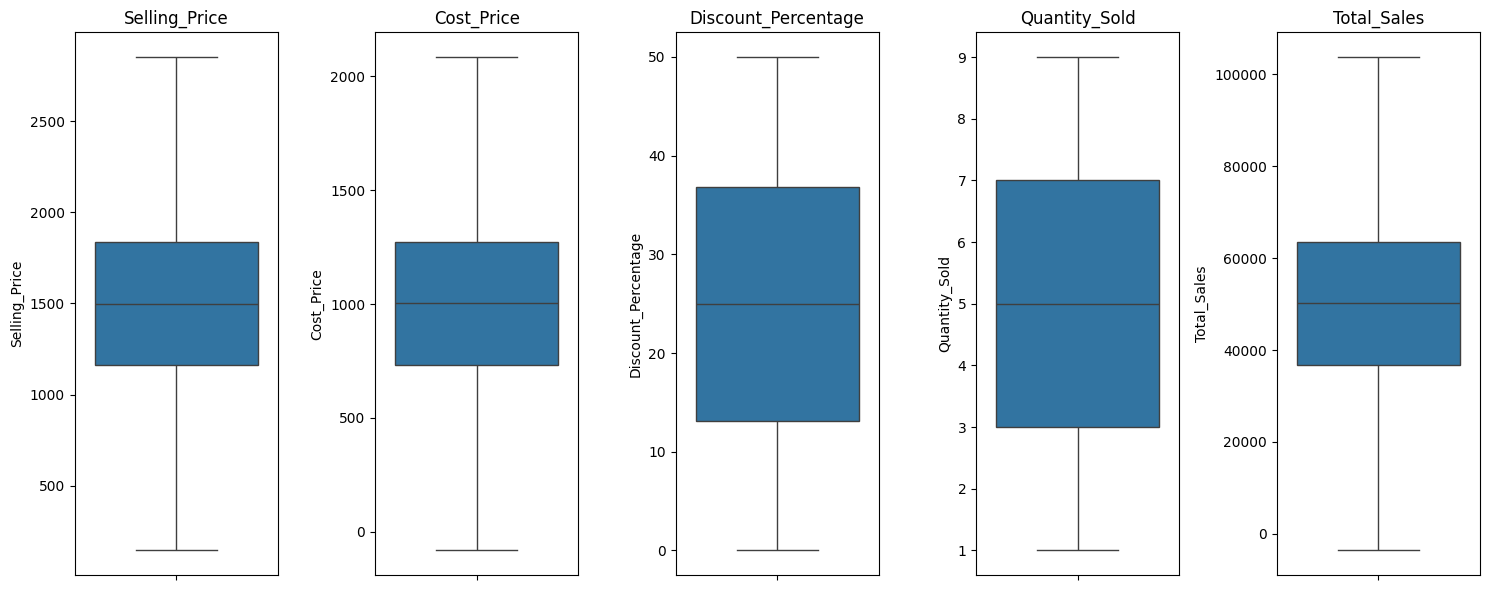

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Selling_Price", "Cost_Price", "Discount_Percentage", "Quantity_Sold", "Total_Sales"]

# Plot boxplots for each numerical feature
plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Distribution of Key Features

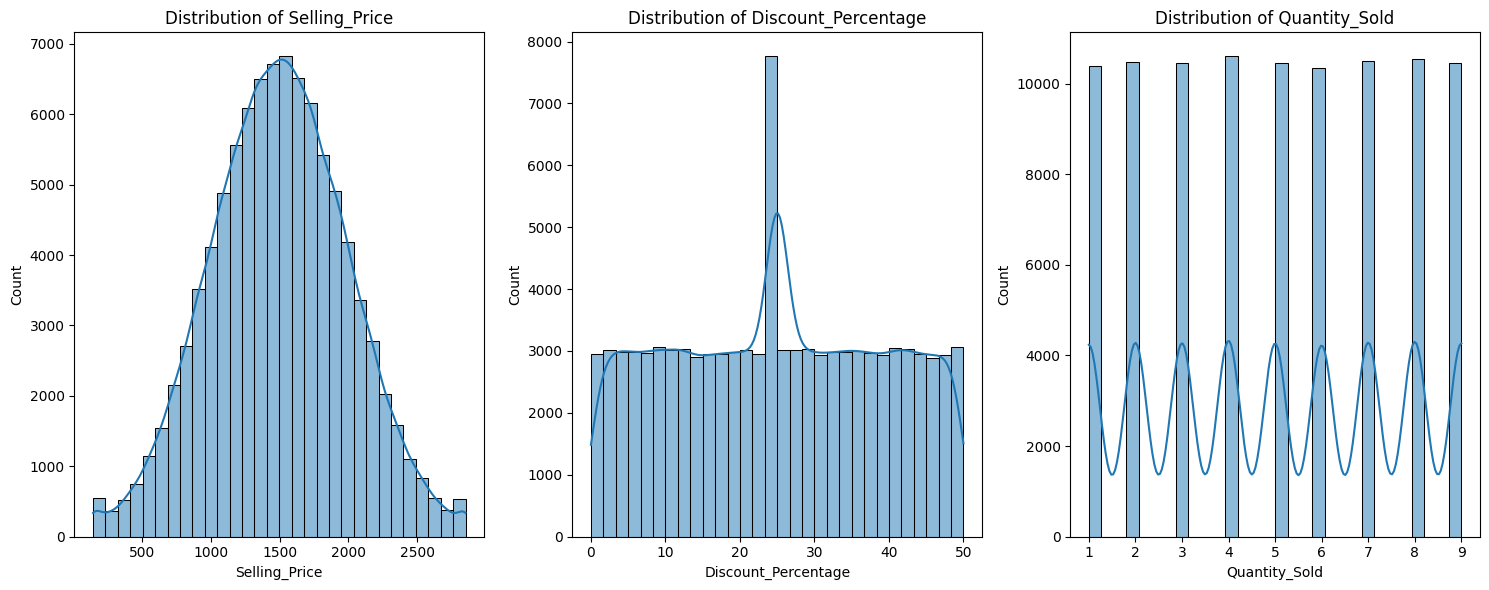

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
for i, col in enumerate(["Selling_Price", "Discount_Percentage", "Quantity_Sold"]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


## Sales Trends Analysis

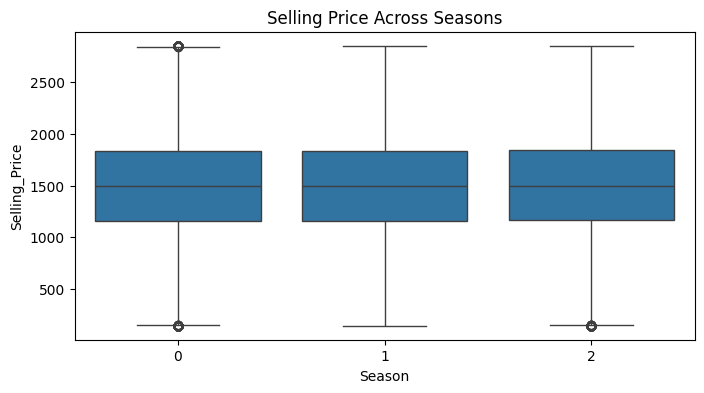

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Season", y="Selling_Price", data=df)
plt.title("Selling Price Across Seasons")
plt.show()

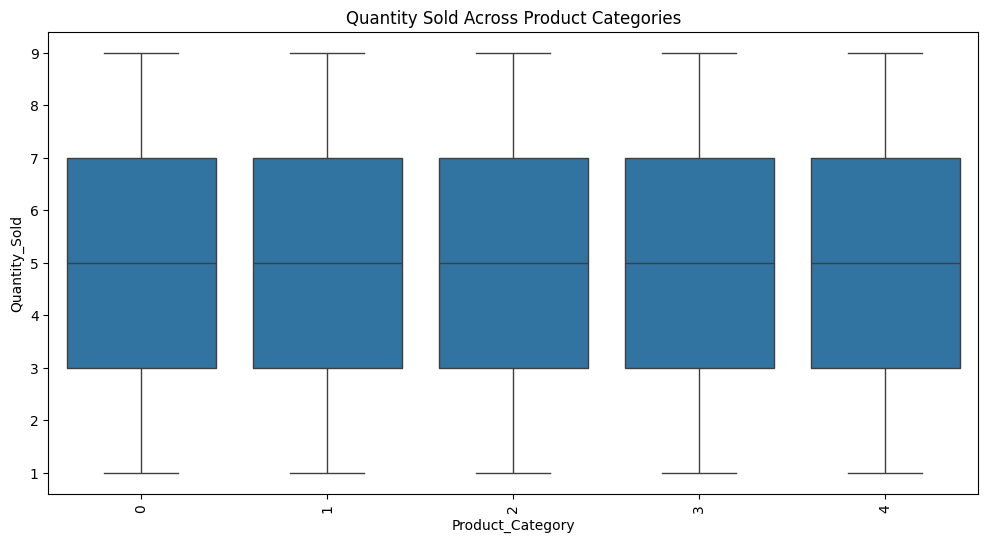

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Product_Category", y="Quantity_Sold", data=df)
plt.xticks(rotation=90)
plt.title("Quantity Sold Across Product Categories")
plt.show()

## Feature Engineering

In [16]:
df["Demand_Index"] = df["Quantity_Sold"] / (df["Stock_Availability"] + 1)  # Avoid division by zero
df["Price_Elasticity"] = df["Discount_Percentage"] * df["Quantity_Sold"]
df["Profit_Margin"] = (df["Selling_Price"] - df["Cost_Price"]) / df["Selling_Price"]

## Select features and target

In [17]:
X = df.drop(columns=["Selling_Price", "Product_Name"])
y = df["Selling_Price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure only numerical columns present in X_train are scaled
num_cols = [col for col in num_cols if col in X_train.columns]
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])



In [18]:
X.head()

,Product_Category,Brand,Gender,Size,Color,Season,Payment_Method,Customer_Type,Cost_Price,Discount_Percentage,...,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Sales_Category,Demand_Index,Price_Elasticity,Profit_Margin
0,4,4,1,2,7,2,0,0,816.027585,26.260791,...,42241.692855,294.0,58.0,2.560957,3.106155,29.293331,0,0.020339,157.564746,0.551000
1,0,12,0,4,8,0,0,1,793.236861,26.882613,...,69318.541482,376.0,40.0,1.590993,3.428439,19.473670,1,0.021220,215.060906,0.525587
2,2,10,0,2,2,0,3,1,890.469629,30.274720,...,56851.121070,48.0,41.0,3.066213,3.765591,22.083407,2,0.102041,151.373600,0.355465
3,0,19,1,1,7,2,3,1,1497.080062,24.996780,...,72084.361720,362.0,32.0,2.194826,4.530297,17.282082,2,0.011019,99.987119,-0.741788
4,0,19,0,3,8,1,2,1,896.187442,24.996780,...,29846.082696,34.0,27.0,2.014097,4.644271,9.379608,2,0.057143,49.993559,0.454269


In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

joblib.dump(rf, 'Sales_Trends_prediction_model_rf.pkl')


['Sales_Trends_prediction_model_rf.pkl']

In [ ]:
import joblib
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

joblib.dump(gb, 'Sales_Trends_prediction_model_gb2.pkl')

In [21]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Evaluate models
rf_mae, rf_rmse, rf_r2 = evaluate_model(rf, X_test, y_test)
gb_mae, gb_rmse, gb_r2 = evaluate_model(gb, X_test, y_test)

In [22]:
y.head()

0    1817.433878
1    1672.038198
2    1381.568069
3     859.507388
4    1642.176945
Name: Selling_Price, dtype: float64

## XGBoost Model

In [23]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": xgb.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print(feature_importance)

important_features = feature_importance.head(15)["Feature"].tolist()
X_train = X_train[important_features]
X_test = X_test[important_features]


                Feature  Importance
20        Profit_Margin    0.605316
8            Cost_Price    0.287391
14   Purchase_Frequency    0.007716
15         Store_Rating    0.007704
19     Price_Elasticity    0.007279
18         Demand_Index    0.007119
13         Customer_Age    0.006981
11          Total_Sales    0.006851
16          Return_Rate    0.006667
9   Discount_Percentage    0.006515
12   Stock_Availability    0.006482
6        Payment_Method    0.006428
1                 Brand    0.005834
5                Season    0.005277
10        Quantity_Sold    0.004925
4                 Color    0.004341
7         Customer_Type    0.004341
17       Sales_Category    0.004211
3                  Size    0.003893
0      Product_Category    0.002718
2                Gender    0.002010


## Hyperparameter Tuning

In [24]:
param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [6, 8, 10],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring="r2", cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

mae_opt = mean_absolute_error(y_test, y_pred_optimized)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
r2_opt = r2_score(y_test, y_pred_optimized)

print("\n Optimized Model Performance")
print(f"MAE: {mae_opt:.2f}")
print(f"RMSE: {rmse_opt:.2f}")
print(f"R² Score: {r2_opt:.2f}")
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits

 Optimized Model Performance
MAE: 15.89
RMSE: 54.74
R² Score: 0.99
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}


In [26]:
print("\n Model Performance Comparison ")
print(f"XGBoost - MAE: {mae_opt:.2f}, RMSE: {rmse_opt:.2f}, R²: {r2_opt:.2f}")
print(f"Random Forest - MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")
print(f"Gradient Boosting - MAE: {gb_mae:.2f}, RMSE: {gb_rmse:.2f}, R²: {gb_r2:.2f}")


 Model Performance Comparison 
XGBoost - MAE: 15.89, RMSE: 54.74, R²: 0.99
Random Forest - MAE: 4.96, RMSE: 22.62, R²: 1.00
Gradient Boosting - MAE: 38.71, RMSE: 75.72, R²: 0.98


## simulate dynamic pricing

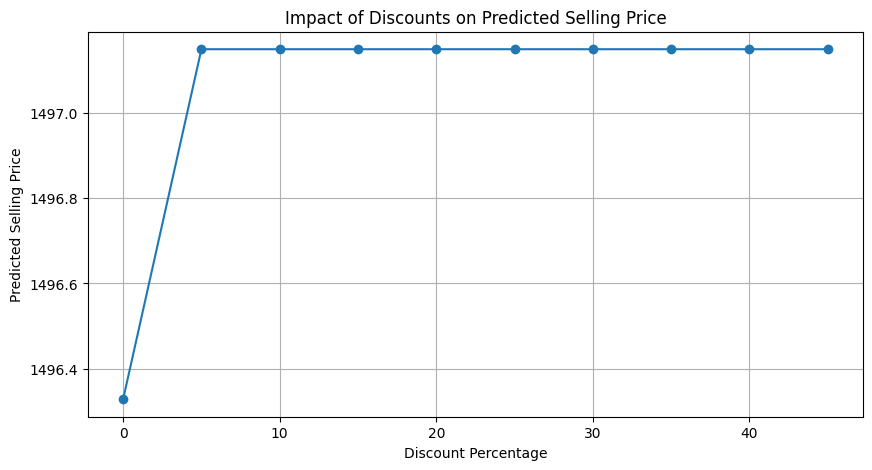

In [27]:
def simulate_dynamic_pricing(model, X_test, base_price, discount_range):
    simulations = []
    for discount in discount_range:
        X_test["Discount_Percentage"] = discount
        predicted_prices = model.predict(X_test)
        simulations.append((discount, predicted_prices.mean()))
    return simulations

discount_range = np.arange(0, 50, 5)  # Discount from 0% to 50%
simulation_results = simulate_dynamic_pricing(best_model, X_test.copy(), y_test, discount_range)

#  Plot Simulation Results
plt.figure(figsize=(10, 5))
plt.plot([x[0] for x in simulation_results], [x[1] for x in simulation_results], marker='o', linestyle='-')
plt.xlabel("Discount Percentage")
plt.ylabel("Predicted Selling Price")
plt.title("Impact of Discounts on Predicted Selling Price")
plt.grid()
plt.show()
